In [3]:
#Feature Scaling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


In [5]:
#data sets
cancer = load_breast_cancer()


In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
df = pd.DataFrame(cancer.data[:,:2],columns=cancer.feature_names[0:2])

df['class'] = cancer.target

df.sample(5)

,mean radius,mean texture,class
359,9.436,18.32,1
389,19.550,23.21,0
365,20.440,21.78,0
111,12.630,20.76,1
145,11.900,14.65,1


In [12]:
df.describe().round(2)

,mean radius,mean texture,class
count,569.00,569.00,569.00
mean,14.13,19.29,0.63
std,3.52,4.30,0.48
min,6.98,9.71,0.00
25%,11.70,16.17,0.00
50%,13.37,18.84,1.00
75%,15.78,21.80,1.00
max,28.11,39.28,1.00


In [14]:
df.isnull().sum() #missing value

mean radius     0
mean texture    0
class           0
dtype: int64

In [15]:
df.groupby('class').count()

,mean radius,mean texture
class,,
0,212,212
1,357,357


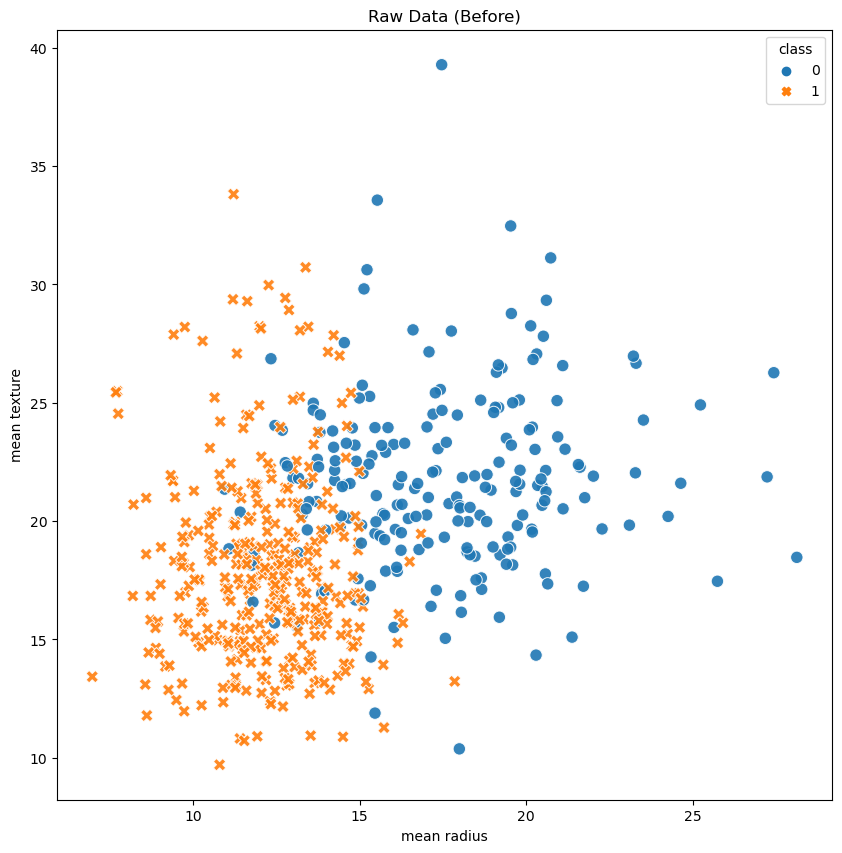

In [17]:
#data visualization

plt.figure(figsize=(10, 10))
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)
plt.title('Raw Data (Before)')
plt.show()

In [25]:
x = df.drop('class',axis=1)
x.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [26]:
y = df['class']

In [29]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_sc = sc.fit_transform(x)
X_sc[:5]

array([[0.52103744, 0.0226581 ],
       [0.64314449, 0.27257355],
       [0.60149557, 0.3902604 ],
       [0.2100904 , 0.36083869],
       [0.62989256, 0.15657761]])

In [30]:
dfsc = pd.DataFrame(X_sc, columns=['mean radius','mean texture']) 
# dfsc = pd.DataFrame(X_sc, columns=cancer.feature_names[0:4])

dfsc['class'] = y

dfsc.describe().round(3)

,mean radius,mean texture,class
count,569.000,569.000,569.000
mean,0.338,0.324,0.627
std,0.167,0.145,0.484
min,0.000,0.000,0.000
25%,0.223,0.218,0.000
50%,0.302,0.309,1.000
75%,0.416,0.409,1.000
max,1.000,1.000,1.000


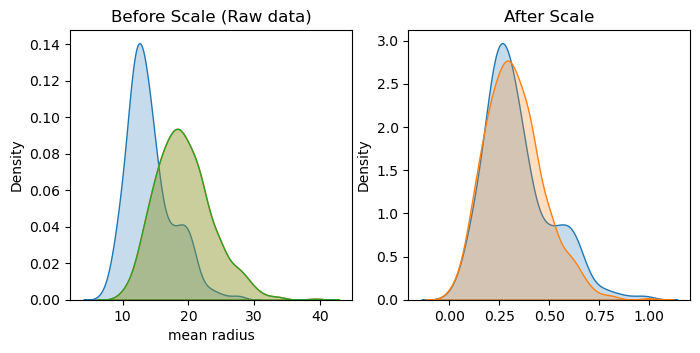

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title('Before Scale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After Scale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

plt.show()